Merge 12 months of sales data into a single csv file

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

convert it into dataset

In [6]:
all_data=pd.read_csv('E:/Internship on data analysis/Project1/Sales Data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


Data cleaning and formatting

In [7]:
all_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [9]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [10]:
all_data = all_data.dropna(how='all')
all_data.shape

(185686, 10)

What is the best month for sale?

In [11]:
'04/19/19 08:46'.split('/')[0]

'04'

In [12]:
def month(x):
    return x.split('/')[0]

add month col

In [13]:
all_data['Month']=all_data['Order Date'].apply(month)

In [14]:
all_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                  int64
dtype: object

In [15]:
all_data['Month'].unique()

array(['30-12-2019 00:01', '29-12-2019 07:03', '12-12-2019 18:21', ...,
       '09-06-2019 22:07', '26-06-2019 18:35', '25-06-2019 14:33'],
      dtype=object)

In [16]:
filter=all_data['Month']=='Order Date'
len(all_data[~filter]) 

185686

In [17]:
all_data=all_data[~filter]

In [18]:
all_data.shape

(185686, 10)

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",30-12-2019 00:01,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",29-12-2019 07:03,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12-12-2019 18:21,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",22-12-2019 15:13,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",18-12-2019 12:38,11.95,Atlanta,12


In [20]:
all_data["Month"]

0         30-12-2019 00:01
1         29-12-2019 07:03
2         12-12-2019 18:21
3         22-12-2019 15:13
4         18-12-2019 12:38
                ...       
185681    07-06-2019 19:02
185682    01-06-2019 19:29
185683    22-06-2019 18:57
185684    26-06-2019 18:35
185685    25-06-2019 14:33
Name: Month, Length: 185686, dtype: object

In [21]:
all_data.dtypes

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                object
Sales               float64
City                 object
Hour                  int64
dtype: object

In [22]:
all_data['Price Each']=all_data['Price Each'].astype(float)

In [23]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

In [24]:
all_data['sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,sales
0,295665,Macbook Pro Laptop,1,1700.00,30-12-2019 00:01,"136 Church St, New York City, NY 10001",30-12-2019 00:01,1700.00,New York City,0,1700.00
1,295666,LG Washing Machine,1,600.00,29-12-2019 07:03,"562 2nd St, New York City, NY 10001",29-12-2019 07:03,600.00,New York City,7,600.00
2,295667,USB-C Charging Cable,1,11.95,12-12-2019 18:21,"277 Main St, New York City, NY 10001",12-12-2019 18:21,11.95,New York City,18,11.95
3,295668,27in FHD Monitor,1,149.99,22-12-2019 15:13,"410 6th St, San Francisco, CA 94016",22-12-2019 15:13,149.99,San Francisco,15,149.99
4,295669,USB-C Charging Cable,1,11.95,18-12-2019 12:38,"43 Hill St, Atlanta, GA 30301",18-12-2019 12:38,11.95,Atlanta,12,11.95


In [25]:
all_data.groupby('Month')['sales'].sum()

Month
01-01-2019 03:07     11.99
01-01-2019 03:40     11.95
01-01-2019 04:56    150.00
01-01-2019 05:53      2.99
01-01-2019 06:03     23.90
                     ...  
31-12-2019 23:37    400.00
31-12-2019 23:42      9.82
31-12-2019 23:45      5.98
31-12-2019 23:52      2.99
31-12-2019 23:53      2.99
Name: sales, Length: 142395, dtype: float64

Which city has max order

In [ ]:
'917 1st St, Dallas, TX 75001'.split(',')[1]

' Dallas'

In [ ]:
def city(x):
    return x.split(',')[1]

In [ ]:
all_data['city']=all_data['Purchase Address'].apply(city)

In [ ]:
all_data.groupby('city')['city'].count()

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64

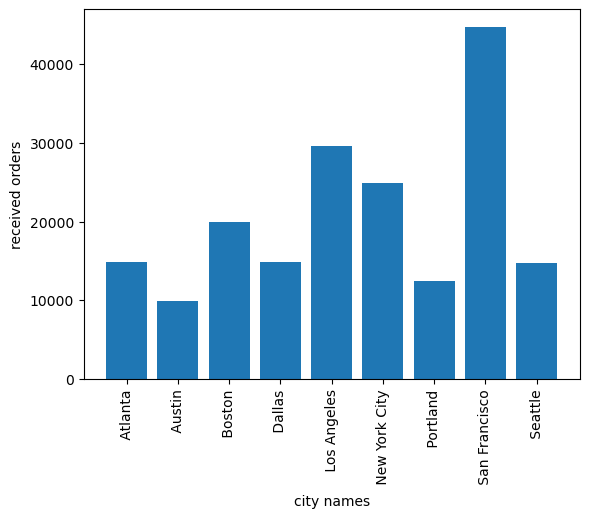

In [ ]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

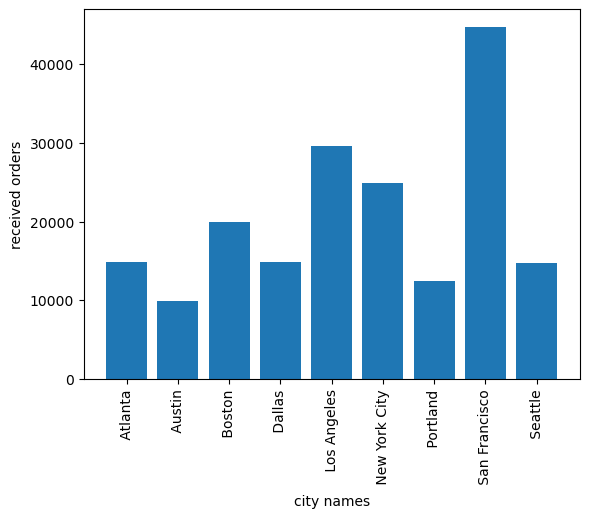

In [ ]:
plt.bar(all_data.groupby('city')['city'].count().index,all_data.groupby('city')['city'].count())
plt.xticks(rotation='vertical')
plt.ylabel('received orders')
plt.xlabel('city names')
plt.show()

What time should we display advertisements to maximise for product purchase?

In [ ]:
# all_data['Order Date'][0].dtype

In [ ]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour

In [ ]:
keys=[]
hour=[]
for key,hour_df in all_data.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_df))

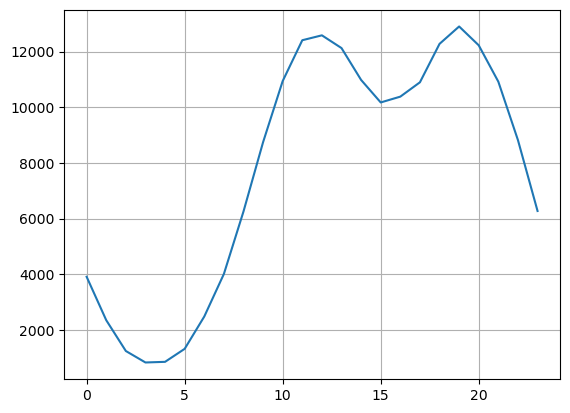

In [ ]:
plt.grid()
plt.plot(keys,hour)

between 12pm and 7pm is probably the best time to advertise to maximise product purchase
What product sold the most? & Why?

<Axes: xlabel='Product'>

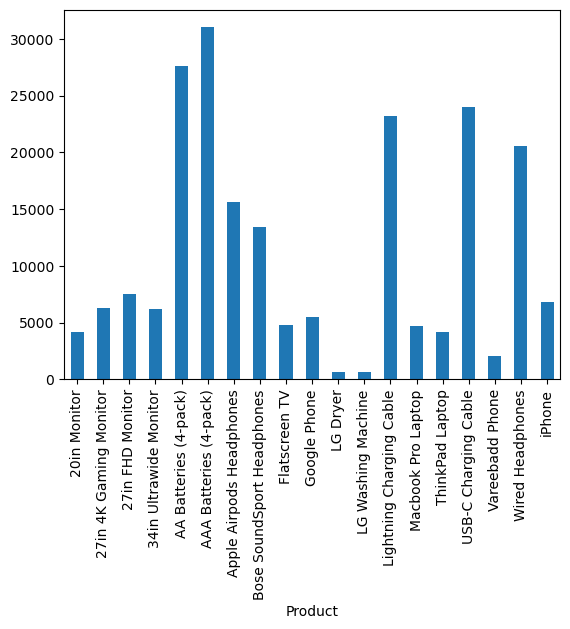

In [ ]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [ ]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [ ]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\User7\AppData\Local\Temp\ipykernel_6440\2263540929.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

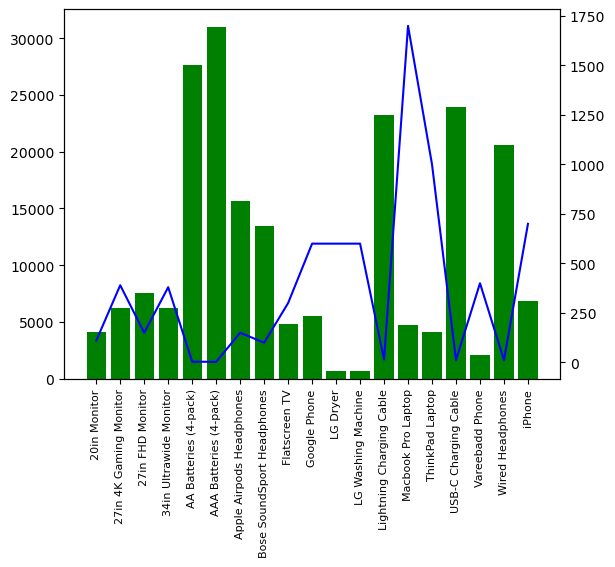

In [ ]:
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, 'b-')
ax1.set_xticklabels(products, rotation='vertical', size=8)

The top selling product is 'AAA Batteries'. The top selling products seem to have a correlation with the price of the product. The cheaper the product higher the quantity ordered and vice versa

In [ ]:
all_data.shape

(185950, 13)

What products are most often sold together?
note: keep orders that have same order Id,are sold mostly together

In [ ]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,sales,city
16,16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,600.00,Boston,12,600.00,Boston
17,17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,11.95,Boston,12,11.95,Boston
18,18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,99.99,Boston,12,99.99,Boston
19,19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,11.99,Boston,12,11.99,Boston
36,36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019-12-13 14:32:00,400.00,New York City,14,400.00,New York City
37,37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019-12-13 14:32:00,23.90,New York City,14,23.90,New York City
42,42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",2019-12-17 12:27:00,3.84,Austin,12,3.84,Austin
43,43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",2019-12-17 12:27:00,99.99,Austin,12,99.99,Austin
66,66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",2019-12-25 14:49:00,700.00,Boston,14,700.00,Boston
67,67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",2019-12-25 14:49:00,14.95,Boston,14,14.95,Boston


In [ ]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\User7\AppData\Local\Temp\ipykernel_6440\2345761670.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.shape

(14649, 14)

In [ ]:
#lets drop out all duplicate Order ID
df2 = df.drop_duplicates(subset=['Order ID'])

<Axes: ylabel='Grouped'>

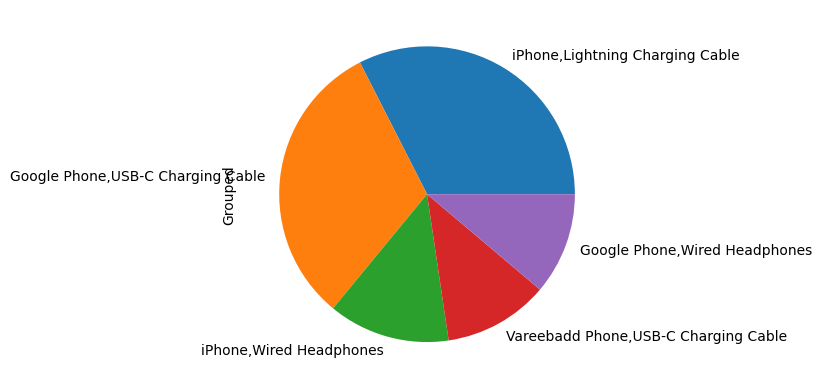

In [ ]:
df2['Grouped'].value_counts()[0:5].plot.pie()

In [ ]:
values=df2['Grouped'].value_counts()[0:5]
labels=df['Grouped'].value_counts()[0:5].index

In [ ]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )

 

In [ ]:
iplot([trace])